##Sentimental analysis on Restaurent Reviews TEST

In [1]:
import requests
import pandas as pd
import json
import base64
import matplotlib.pyplot as plt
import tensorflow as tf
import requests
from pprint import PrettyPrinter


In [2]:
data = pd.read_csv('data/Restaurant_Reviews.csv')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
Review_test = data['Review'][4]
Review_test

'The selection on the menu was great and so were the prices.'

In [4]:
pp = PrettyPrinter()
pp.pprint(requests.get("http://103.190.215.21:8501/v1/models/restaurant-reviews-model").json())

{'model_version_status': [{'state': 'AVAILABLE',
                           'status': {'error_code': 'OK', 'error_message': ''},
                           'version': '1713691875'}]}


In [5]:
def prepare_json(Review):
    feature_spec = {
        "Review": tf.train.Feature(bytes_list=tf.train.BytesList(value=[bytes(Review, "utf-8")])),
    }
    
    example = tf.train.Example(
        features=tf.train.Features(feature=feature_spec)
    ).SerializeToString()
    
    result = [
        {
            "examples": {
                "b64": base64.b64encode(example).decode()
            }
        }
    ]
    
    return json.dumps({
        "signature_name": "serving_default",
        "instances": result
    })

In [6]:
response = requests.post("http://103.190.215.21:8501/v1/models/restaurant-reviews-model:predict", data=prepare_json(Review_test))
prediction = response.json().get("predictions")

print(prediction)
if prediction:
    prediction_value = prediction[0][0]
    result = "Review Positif" if prediction_value > 0.6 else "Review negatif"
else:
    result = "Error: No predictions found in response."

print(result)

[[0.999248683]]
Review Positif


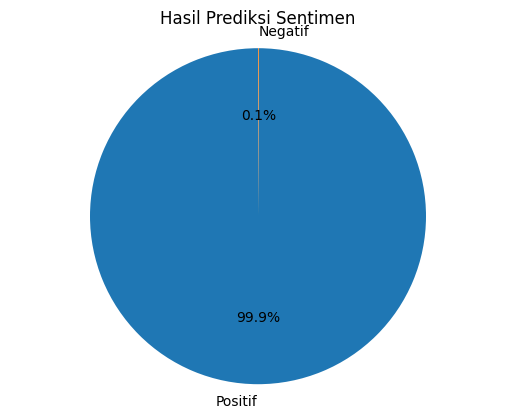

In [7]:
labels = ['Positif', 'Negatif']
sizes = [prediction_value, 1 - prediction_value] 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 

plt.title('Hasil Prediksi Sentimen')
plt.show()